In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\Kerry\ai_job_trends_dataset.csv')
df.shape

(30000, 13)

In [2]:
df.head()

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [3]:
df.tail()

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
29995,"Psychotherapist, dance movement",Education,Increasing,Moderate,142238.00,PhD,16,7816,1363,56.91,27.27,China,65.90
29996,"Scientist, water quality",IT,Decreasing,Moderate,123107.50,Associate Degree,19,9358,7632,27.25,12.84,UK,31.18
29997,Web designer,Manufacturing,Decreasing,Moderate,97305.51,Master’s Degree,0,9605,2559,31.76,16.82,China,26.07
29998,Primary school teacher,Entertainment,Increasing,Moderate,95599.22,High School,15,5481,4879,32.46,45.93,Brazil,40.43
29999,Company secretary,Education,Increasing,Low,65679.61,High School,15,4435,5902,34.54,78.93,Germany,21.75


In [4]:
df.describe()

,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,90119.965639,10.051433,5039.640833,5074.218100,49.836431,50.154229,49.979660
std,34412.013953,6.060678,2861.009654,2866.550722,28.966688,28.754889,17.274665
min,30001.860000,0.000000,100.000000,100.000000,0.000000,0.000000,20.000000
25%,60500.702500,5.000000,2570.000000,2586.750000,24.570000,25.400000,35.070000
50%,90274.115000,10.000000,5034.000000,5106.500000,49.570000,50.020000,49.885000
75%,119454.710000,15.000000,7527.000000,7573.000000,75.100000,75.030000,64.910000
max,149998.500000,20.000000,10000.000000,10000.000000,100.000000,99.990000,80.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [6]:
df.isnull().sum()

Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64

In [7]:
df.duplicated().sum()

0

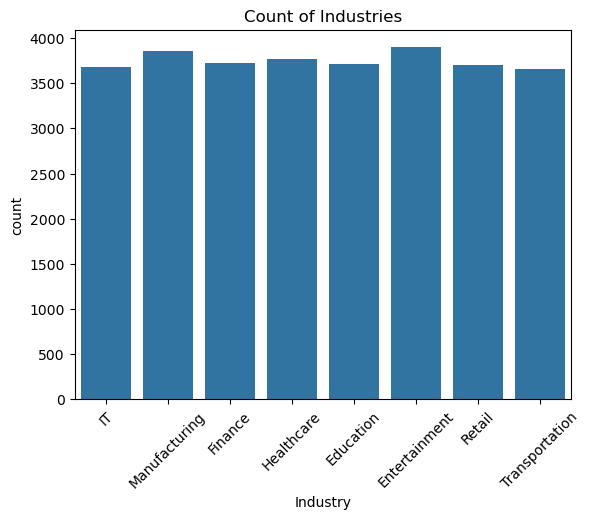

In [8]:
sns.countplot(data=df, x='Industry')
plt.title('Count of Industries')
plt.xticks(rotation=45)
plt.show()

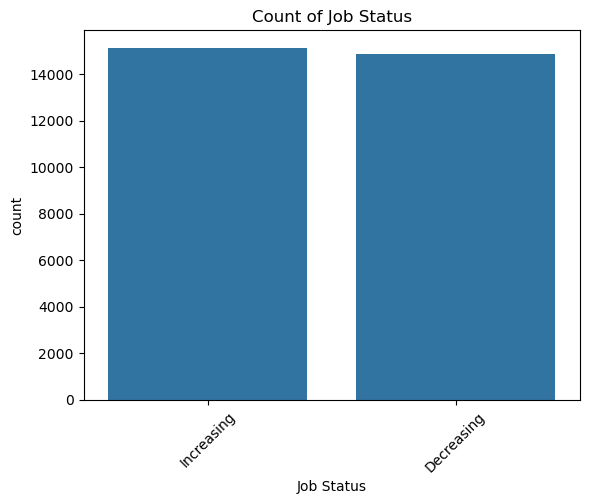

In [9]:
sns.countplot(data=df, x='Job Status')
plt.title('Count of Job Status')
plt.xticks(rotation=45)
plt.show()

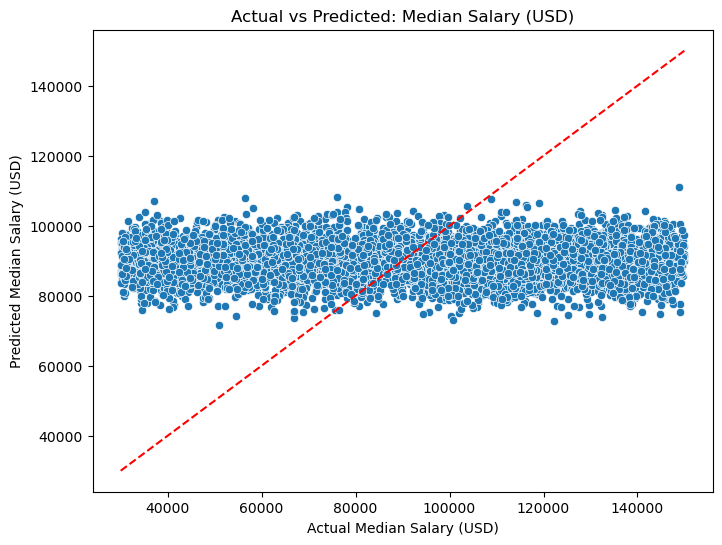

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans

# Encode categorical columns
df_encoded = df.copy()
le = LabelEncoder()
for col in ['Job Title', 'Industry', 'Job Status', 'AI Impact Level', 'Required Education', 'Location']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Regression 
X_reg = df_encoded.drop(['Median Salary (USD)'], axis=1)
y_reg = df_encoded['Median Salary (USD)']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

# Regression: Actual vs Predicted plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], '--r')
plt.xlabel('Actual Median Salary (USD)')
plt.ylabel('Predicted Median Salary (USD)')
plt.title('Actual vs Predicted: Median Salary (USD)')
plt.show()

In [ ]:
# ----------------------- Classification ------------------------
X_clf = df_encoded.drop(['AI Impact Level'], axis=1)
y_clf = df_encoded['AI Impact Level']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

clf_model = RandomForestClassifier()
clf_model.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_model.predict(X_test_clf)

# Classification: Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf_model, X_test_clf, y_test_clf, cmap='Blues')
plt.title('Confusion Matrix: AI Impact Level Classification')
plt.show()

# ------------------------- Clustering ----------------------------
X_cluster = df_encoded.drop(['AI Impact Level', 'Job Status'], axis=1)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Clustering: Scatter plot of two key features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Automation Risk (%)', y='Median Salary (USD)', hue='Cluster', palette='viridis')
plt.title('Clustering by Automation Risk and Median Salary')
plt.show()